<a href="https://colab.research.google.com/github/ParthDave111/Quant-and-Finance-File/blob/main/Option_pricing_with_CIR_and_BCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6261.1997.tb02749.x?casa_token=ZcwS53G2rAUAAAAA%3AagSK9aKB4tz5-9UIfqYzF-JbCW0tkeCQIAQQN_Wsm9L9JjnnjvzW1Gw5uXEqbDcM0KeOyd64zW-w6FY

SyntaxError: invalid decimal literal (<ipython-input-1-a983b3e67896>, line 1)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

VASICEK MODEL

In [3]:
def vasicek(r0, k, theta, sigma, T, N, M):
    dt = T / N
    rates = np.zeros((N, M))
    rates[0, :] = r0
    for j in range(M):
        for i in range(1, N):
            dr = (
                k * (theta - rates[i - 1, j]) * dt
                + sigma * np.sqrt(dt) * np.random.normal()
            )
            rates[i, j] = rates[i - 1, j] + dr
    return rates

In [4]:
M = 100  # Number of paths for MC
N = 100  # Number of steps
T = 1.0  # Maturity
r0 = 0.023
k = 0.20
theta = 0.01
sigma = 0.012
t = np.linspace(0, T, N)

rates = vasicek(r0, k, theta, sigma, T, N, M)

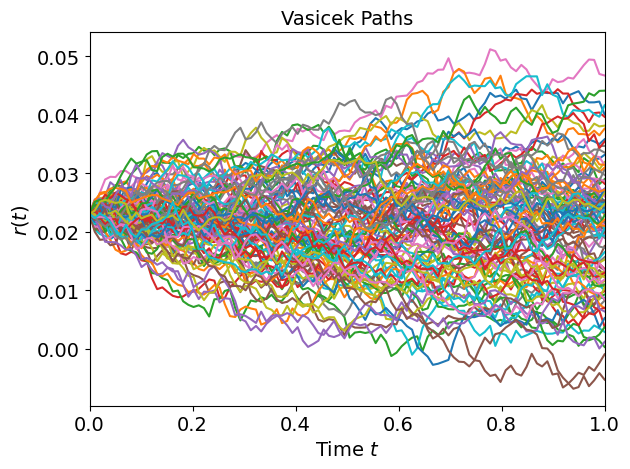

In [5]:
for j in range(M):
    plt.plot(t, rates[:, j])

plt.xlabel("Time $t$", fontsize=14)
plt.ylabel("$r(t)$", fontsize=14)
plt.title("Vasicek Paths", fontsize=14)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

COX INGERSOLL ROSS MODEL

In [6]:
def cir(r0, k, theta, sigma, T, N, M):
    dt = T / N
    rates = np.zeros((N, M))
    rates[0, :] = r0
    for j in range(M):
        for i in range(1, N):
            dr = (
                k * (theta - rates[i - 1, j]) * dt
                + sigma
                * np.sqrt(dt)
                * np.sqrt(np.maximum(rates[i - 1, j], 0))
                * np.random.normal()
            )
            rates[i, j] = rates[i - 1, j] + dr
    return rates

In [7]:
rates_cir = cir(r0, k, theta, sigma, T, N, M)

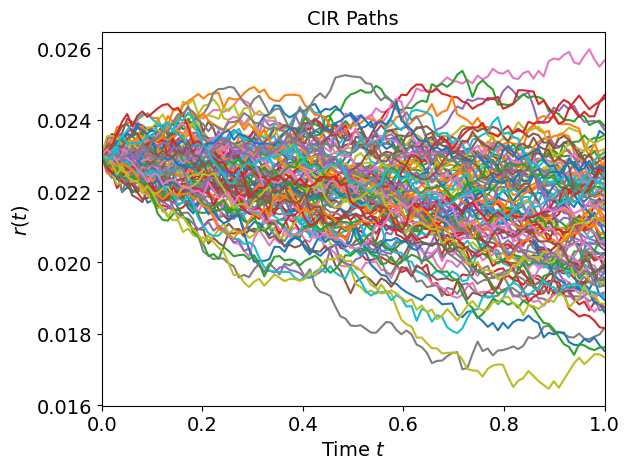

In [8]:
for j in range(M):
    plt.plot(t, rates_cir[:, j])

plt.xlabel("Time $t$", fontsize=14)
plt.ylabel("$r(t)$", fontsize=14)
plt.title("CIR Paths", fontsize=14)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

Comparision of Vasicek and CIR

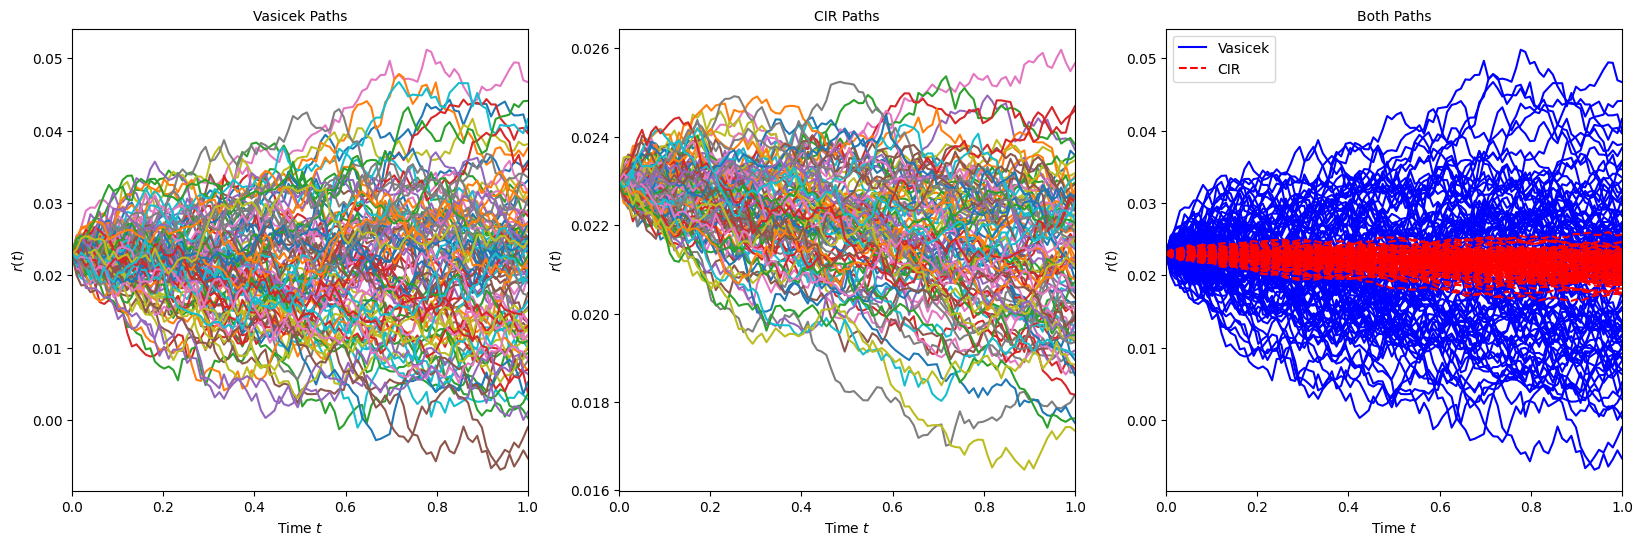

In [9]:
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.plot(t, rates[:, :])
plt.xlabel("Time $t$", fontsize=10)
plt.ylabel("$r(t)$", fontsize=10)
plt.title("Vasicek Paths", fontsize=10)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(132)
plt.plot(t, rates_cir[:, :])
plt.xlabel("Time $t$", fontsize=10)
plt.ylabel("$r(t)$", fontsize=10)
plt.title("CIR Paths", fontsize=10)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(133)
plt.plot(t, rates[:, 1:], "b")
plt.plot(t, rates[:, 0], "b", label="Vasicek")
plt.plot(t, rates_cir[:, 1:], "r--")
plt.plot(t, rates_cir[:, 0], "r--", label="CIR")
plt.legend()
plt.xlabel("Time $t$", fontsize=10)
plt.ylabel("$r(t)$", fontsize=10)
plt.title("Both Paths", fontsize=10)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##Module 2

Calibration of Interest Rate Models

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
mat_list = np.array((1, 7, 14, 30, 60, 90, 180, 270, 360)) / 360
rate_list = (
    np.array((-0.032, -0.013, -0.013, 0.007, 0.043, 0.083, 0.183, 0.251, 0.338)) / 100
)

In [13]:
r0 = rate_list[0]
factors = 1 + mat_list * rate_list
zero_rates = 1 / mat_list * np.log(factors)

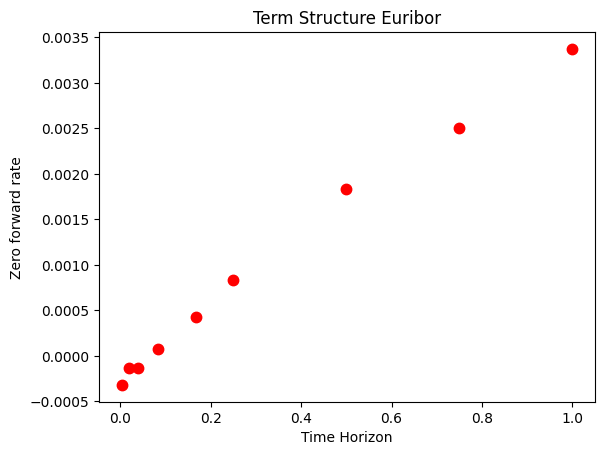

In [14]:
plt.plot(mat_list, zero_rates, "r.", markersize="15")
plt.xlabel("Time Horizon")
plt.ylabel("Zero forward rate")
plt.title("Term Structure Euribor")
plt.show()

Interpolation of Market Rates

In [15]:
from scipy.interpolate import splev, splrep

In [16]:
bspline = splrep(mat_list, zero_rates, k=3)  # Cubic spline
mat_list_n = np.linspace(
    0.0, 1.0, 24
)  # Create 24 equally spaced maturities between 0 and 1
inter_rates = splev(mat_list_n, bspline, der=0)  # Interpolated rates

first_der = splev(mat_list_n, bspline, der=1)  # First derivative of spline
f = (
    inter_rates + first_der * mat_list_n
)  # Forward rate given interpolated ones and first derivative

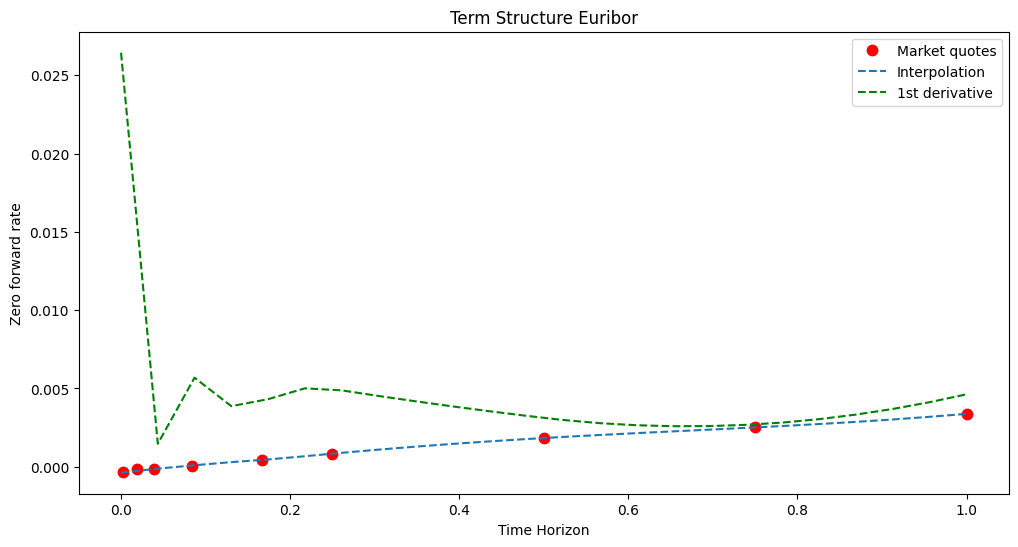

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(mat_list, zero_rates, "r.", markersize="15", label="Market quotes")
plt.plot(mat_list_n, inter_rates, "--", markersize="10", label="Interpolation")
plt.plot(mat_list_n, first_der, "g--", markersize="10", label="1st derivative")
plt.xlabel("Time Horizon")
plt.ylabel("Zero forward rate")
plt.title("Term Structure Euribor")
plt.legend()
plt.show()

In [18]:
def CIR_forward_rate(alpha):
    """
    Forward rates in CIR (1985) model
    The set of parameters is called alpha and include Kappa_r, Theta_r and Sigma_r
    """

    kappa_r, theta_r, sigma_r = alpha

    t = mat_list_n
    g = np.sqrt(kappa_r**2 + 2 * sigma_r**2)

    s1 = (kappa_r * theta_r * (np.exp(g * t) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * t) - 1)
    )

    s2 = r0 * (
        (4 * g**2 * np.exp(g * t)) / (2 * g + (kappa_r + g) * (np.exp(g * t)) ** 2)
    )

    return s1 + s2

 Error Function

In [19]:
def CIR_error_function(alpha):
    """
    Error function to calibrate CIR (1985) model
    """

    kappa_r, theta_r, sigma_r = alpha

    # Few remarks to avoid problems for certain values of parameters:
    if 2 * kappa_r * theta_r < sigma_r**2:
        return 100
    if kappa_r < 0 or theta_r < 0 or sigma_r < 0.001:
        return 100

    forward_rates = CIR_forward_rate(alpha)
    MSE = np.sum((f - forward_rates) ** 2) / len(f)

    return MSE

In [20]:
from scipy.optimize import fmin

In [21]:
def CIR_calibration():
    opt = fmin(
        CIR_error_function,
        [1.0, 0.02, 0.1],
        xtol=0.00001,
        ftol=0.00001,
        maxiter=300,
        maxfun=500,
    )

    return opt

In [22]:
params = CIR_calibration()
params

<ipython-input-21-02f6995259bf>:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt = fmin(


array([0.06831325, 0.20771701, 0.11263583])

In [23]:
def plot_calibrated_frc(opt):
    """Plots market and calibrated forward rate curves."""
    forward_rates = CIR_forward_rate(opt)
    plt.figure(figsize=(12, 8))
    plt.subplot(211)
    plt.title("CIR model calibration")
    plt.ylabel("Forward rate $f(0,T)$")
    plt.plot(mat_list_n, f, "ro", label="market")
    plt.plot(mat_list_n, forward_rates, "b--", label="model")
    plt.legend(loc=0)
    plt.axis(
        [min(mat_list_n) - 0.05, max(mat_list_n) + 0.05, min(f) - 0.005, max(f) * 1.1]
    )
    plt.subplot(212)
    wi = 0.02
    plt.bar(mat_list_n - wi / 2, forward_rates - f, width=wi)
    plt.xlabel("Time horizon")
    plt.ylabel("Difference")
    plt.axis(
        [
            min(mat_list_n) - 0.05,
            max(mat_list_n) + 0.05,
            min(forward_rates - f) * 1.1,
            max(forward_rates - f) * 1.1,
        ]
    )
    plt.tight_layout()

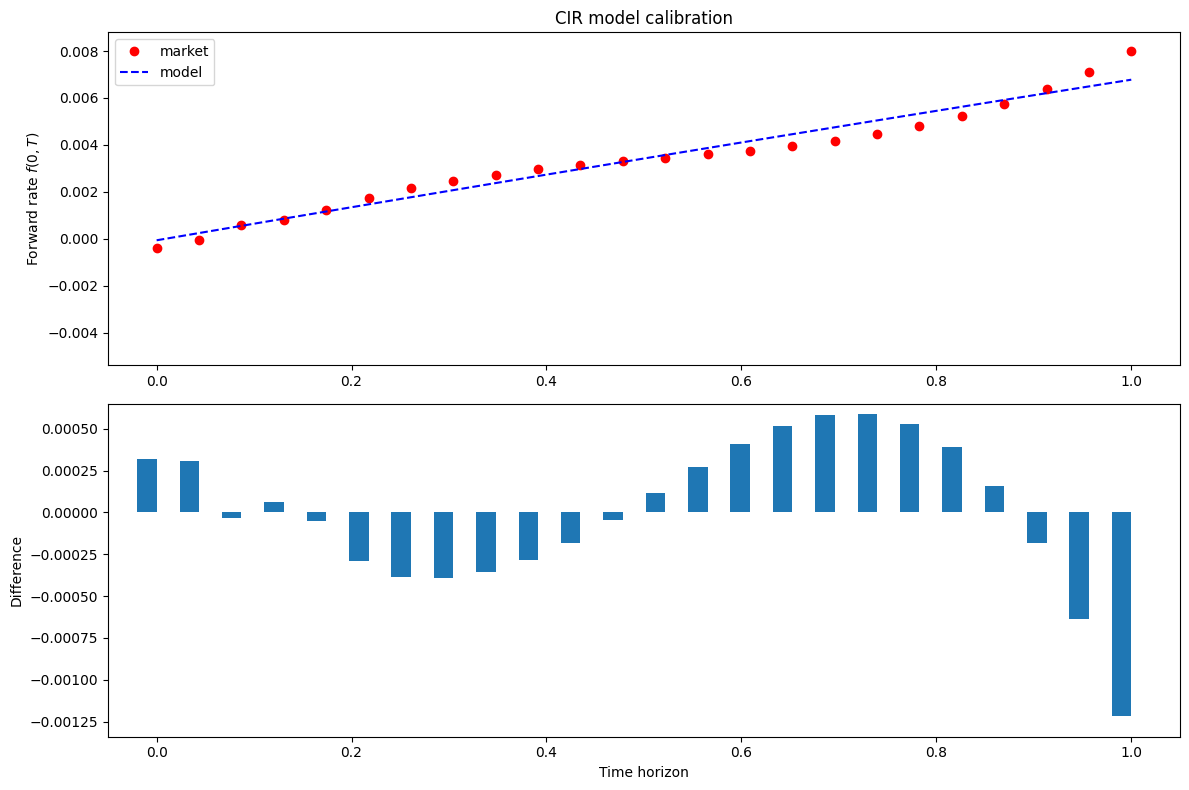

In [24]:
plot_calibrated_frc(params)

Module 3

## Module 3

BCC MODEL


In [25]:
import numpy as np
from scipy.integrate import quad

In [26]:
# Call Value function


def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: B96_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

In [27]:
# Heston (1993) characteristic function


def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    Parameter definitions see function BCC_call_value."""
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

In [28]:
# Merton (1976) characteristic function


def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """

    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

In [29]:
# Bates (1996) characteristic function (H93+M76)


def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

In [30]:
# Lewis (2001) integral value of Bates (1996)


def B96_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for Bates (1996) characteristic function
    """
    char_func_value = B96_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

BCC (1997)

In [31]:
# Call Value function


def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

In [32]:
# BCC (1997) characteristic function (H93+M76)


def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    BCC (1997) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

In [33]:
# Lewis (2001) integral value of BCC (1997)


def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for BCC (1997) characteristic function
    """
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

In [34]:
def gamma(kappa_r, sigma_r):
    """
    Gamma function in CIR (1985)
    """
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

In [35]:
def b1(alpha):
    """
    b1 function in CIR (1985)
    alpha is the parameter set
    """
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)

    return x

In [36]:
def b2(alpha):
    """
    b2 function in CIR (1985)
    alpha is the parameter set
    """
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )

    return x

In [37]:
def B(alpha):
    """
    ZCB prices in the CIR (1985) model
    """
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha

    E_rt = theta_r + np.exp(-kappa_r * t) * (r0 - theta_r)

    zcb = b_1 * np.exp(-b_2 * E_rt)

    return zcb

Pricing Results and Comparisons

In [38]:
# Short-rates
r0 = -0.032 / 100
kappa_r = 0.068
theta_r = 0.207
sigma_r = 0.112

# SV
kappa_v = 18.447
theta_v = 0.026
sigma_v = 0.978
rho = -0.821
v0 = 0.035

# JD
lamb = 0.008
mu = -0.600
delta = 0.001

In [39]:
B96_call = B96_call_value(
    100, 90, 1, r0, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
)
print("Call value under Bates (1996): ", B96_call)

Call value under Bates (1996):  12.815339205009309


In [40]:
B0T = B([r0, kappa_r, theta_r, sigma_r, 0, 1])
r = -np.log(B0T) / 1

In [41]:
BCC_call = BCC_call_value(
    100, 90, 1, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
)
print("Call value under BCC (1997): ", BCC_call)

Call value under BCC (1997):  13.277735226230874


In [356]:
# Short-rates
r0 = 0.015/100
kappa_r = 0.065
theta_r = 0.45
sigma_r = 0.05

# SV
kappa_v = 25
theta_v = 0.065
sigma_v = 0.08
rho = -0.98
v0 = 0.025

# JD
lamb = 1.8
mu = -0.75
delta = 0.35

In [357]:
r

0.015

In [358]:
T

0.0136986301369863

In [359]:
BCC_call = BCC_call_value(
    697, 700, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
)
print("Call value under BCC (1997): ", BCC_call)

Call value under BCC (1997):  8.95488175115986


## Module 4

BCC MODEL CALIBRATION

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
from scipy.interpolate import splev, splrep
from scipy.optimize import brute, fmin

In [43]:
# Euribor Market data
mat_list = np.array((1, 7, 14, 30, 60, 90, 180, 270, 360)) / 360
rate_list = (
    np.array((-0.032, -0.013, -0.013, 0.007, 0.043, 0.083, 0.183, 0.251, 0.338)) / 100
)

In [44]:
# Capitalization factors and Zero-rates
r0 = rate_list[0]
factors = 1 + mat_list * rate_list
zero_rates = 1 / mat_list * np.log(factors)

In [45]:
# Interpolation and Forward rates
bspline = splrep(mat_list, zero_rates, k=3)  # Cubic spline
mat_list_n = np.linspace(
    0.0, 1.0, 24
)  # Create 24 equally spaced maturities between 0 and 1
inter_rates = splev(mat_list_n, bspline, der=0)  # Interpolated rates

first_der = splev(mat_list_n, bspline, der=1)  # First derivative of spline
f = (
    inter_rates + first_der * mat_list_n
)  # Forward rate given interpolated ones and first derivative

In [46]:
# CIR (1985) Forward rate function


def CIR_forward_rate(alpha):
    """
    Forward rates in CIR (1985) model
    The set of parameters is called alpha and include Kappa_r, Theta_r and Sigma_r
    """

    kappa_r, theta_r, sigma_r = alpha

    t = mat_list_n
    g = np.sqrt(kappa_r**2 + 2 * sigma_r**2)

    s1 = (kappa_r * theta_r * (np.exp(g * t) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * t) - 1)
    )

    s2 = r0 * (
        (4 * g**2 * np.exp(g * t)) / (2 * g + (kappa_r + g) * (np.exp(g * t)) ** 2)
    )

    return s1 + s2

In [47]:
# CIR (1985) Error function


def CIR_error_function(alpha):
    """
    Error function to calibrate CIR (1985) model
    """

    kappa_r, theta_r, sigma_r = alpha

    # Few remarks to avoid problems for certain values of parameters:
    if 2 * kappa_r * theta_r < sigma_r**2:
        return 100
    if kappa_r < 0 or theta_r < 0 or sigma_r < 0.001:
        return 100

    forward_rates = CIR_forward_rate(alpha)
    MSE = np.sum((f - forward_rates) ** 2) / len(f)

    return MSE

In [48]:
# CIR (1985) Calibration via minimizing Forward rate differences


def CIR_calibration():
    opt = fmin(
        CIR_error_function,
        [1.0, 0.02, 0.1],
        xtol=0.00001,
        ftol=0.00001,
        maxiter=300,
        maxfun=500,
    )

    return opt

In [49]:
params_CIR = CIR_calibration()
params_CIR

<ipython-input-48-8f00db41991c>:5: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt = fmin(


array([0.06831325, 0.20771701, 0.11263583])

In [50]:
# CIR (1985) calibrated parameters
kappa_r, theta_r, sigma_r = params_CIR

In [51]:
# Option market data loading
h5 = pd.HDFStore("option_data_M2.h5", "r")
data = h5["data"]  # European call & put option data (3 maturities)
h5.close()
S0 = 3225.93  # EURO STOXX 50 level 30.09.2014

In [52]:
data

,Date,Strike,Call,Maturity,Put
0,1412035200000000000,1850.0,1373.6,1418947200000000000,0.5
1,1412035200000000000,1900.0,1323.7,1418947200000000000,0.6
2,1412035200000000000,1950.0,1273.8,1418947200000000000,0.8
3,1412035200000000000,2000.0,1223.9,1418947200000000000,0.9
4,1412035200000000000,2050.0,1174.1,1418947200000000000,1.1
...,...,...,...,...,...
462,1412035200000000000,3325.0,9.1,1413504000000000000,101.3
463,1412035200000000000,3350.0,5.1,1413504000000000000,122.4
464,1412035200000000000,3375.0,2.8,1413504000000000000,145.0
465,1412035200000000000,3400.0,1.5,1413504000000000000,168.7


In [53]:
# Selection of options for calibration
tol = 0.02  # percent ITM/OTM options
options = data[(np.abs(data["Strike"] - S0) / S0) < tol]
options["Date"] = pd.DatetimeIndex(options["Date"])
options["Maturity"] = pd.DatetimeIndex(options["Maturity"])

<ipython-input-53-c09ff0550370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options["Date"] = pd.DatetimeIndex(options["Date"])
<ipython-input-53-c09ff0550370>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options["Maturity"] = pd.DatetimeIndex(options["Maturity"])


In [54]:
mats = sorted(set(options["Maturity"]))
options = options[options["Maturity"] == mats[0]]

In [55]:
# ZCB pricing functions under CIR (1985)


def gamma(kappa_r, sigma_r):
    """
    Gamma function in CIR (1985)
    """
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)


def b1(alpha):
    """
    b1 function in CIR (1985)
    alpha is the parameter set
    """
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)

    return x


def b2(alpha):
    """
    b2 function in CIR (1985)
    alpha is the parameter set
    """
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )

    return x


def B(alpha):
    """
    ZCB prices in the CIR (1985) model
    """
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha

    E_rt = theta_r + np.exp(-kappa_r * t) * (r0 - theta_r)

    zcb = b_1 * np.exp(-b_2 * E_rt)

    return zcb

In [56]:
# Including short rates and time to maturity
for row, option in options.iterrows():
    T = (option["Maturity"] - option["Date"]).days / 365.0
    options.loc[row, "T"] = T
    B0T = B([r0, kappa_r, theta_r, sigma_r, 0, T])
    options.loc[row, "r"] = -np.log(B0T) / T

Calibration of Heston model

In [57]:
i = 0
min_MSE = 500

In [58]:
def H93_error_function(p0):
    """Error function for parameter calibration via
    Lewis (2001) Fourier approach for Heston (1993).
    Parameters
    ==========
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial, instantaneous variance
    Returns
    =======
    MSE: float
        mean squared error
    """
    global i, min_MSE
    kappa_v, theta_v, sigma_v, rho, v0 = p0
    if kappa_v < 0.0 or theta_v < 0.005 or sigma_v < 0.0 or rho < -1.0 or rho > 1.0:
        return 500.0
    if 2 * kappa_v * theta_v < sigma_v**2:
        return 500.0
    se = []
    for row, option in options.iterrows():
        model_value = H93_call_value(
            S0,
            option["Strike"],
            option["T"],
            option["r"],
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
        )
        se.append((model_value - option["Call"]) ** 2)
    MSE = sum(se) / len(se)
    min_MSE = min(min_MSE, MSE)
    if i % 100 == 0:
        print("%4d |" % i, np.array(p0), "| %7.3f | %7.3f" % (MSE, min_MSE))
    i += 1
    return MSE

In [59]:
def H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)

    Parameter definition:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    Returns
    =======
    call_value: float
        present value of European call option
    """
    int_value = quad(
        lambda u: H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

In [60]:
def H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Fourier-based approach for Lewis (2001): Integration function.
    """
    char_func_value = H93_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

In [61]:
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    Parameter definitions see function BCC_call_value."""
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

In [62]:
def H93_calibration_full():
    """Calibrates Heston (1993) stochastic volatility model to market quotes."""
    # First run with brute force
    # (scan sensible regions, for faster convergence)
    p0 = brute(
        H93_error_function,
        (
            (2.5, 10.6, 5.0),  # kappa_v
            (0.01, 0.041, 0.01),  # theta_v
            (0.05, 0.251, 0.1),  # sigma_v
            (-0.75, 0.01, 0.25),  # rho
            (0.01, 0.031, 0.01),
        ),  # v0
        finish=None,
    )

    # Second run with local, convex minimization
    # (we dig deeper where promising results)
    opt = fmin(
        H93_error_function, p0, xtol=0.000001, ftol=0.000001, maxiter=950, maxfun=900
    )
    return opt

In [63]:
kappa_v, theta_v, sigma_v, rho, v0 = H93_calibration_full()

   0 | [ 2.5   0.01  0.05 -0.75  0.01] | 366.955 | 366.955
 100 | [ 2.5   0.04  0.05 -0.5   0.02] |  63.926 |   6.589
 200 | [ 7.5   0.02  0.25 -0.25  0.03] |  11.119 |   6.589
 300 | [ 1.678065    0.03263888  0.30623977 -0.9250553   0.03049744] |   4.802 |   4.627
 400 | [ 1.48034684  0.03519223  0.3190103  -0.99986661  0.03029015] |   4.163 |   4.162
 500 | [ 1.32002332  0.07534462  0.44593412 -0.99165255  0.03023096] |   2.985 |   2.985
 600 | [ 1.1826757   0.10177896  0.49064827 -0.9872959   0.02916145] |   2.069 |   2.069
 700 | [ 1.23041469  0.11511016  0.53222589 -0.98440602  0.02906222] |   1.797 |   1.797
 800 | [ 1.22834306  0.11782459  0.53801295 -0.98390762  0.02896912] |   1.725 |   1.725
 900 | [ 1.23231343  0.11886808  0.54126283 -0.98368121  0.02896045] |   1.708 |   1.707


<ipython-input-62-bc280d68f667>:19: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt = fmin(


Callibration of Jump Component

In [64]:
i = 0
min_MSE = 5000.0
local_opt = False


def BCC_error_function_v1(p0):
    """
    Error function for BCC (1997) model
    """
    global i, min_MSE, local_opt, opt1
    lamb, mu, delta = p0
    if lamb < 0.0 or mu < -0.6 or mu > 0.0 or delta < 0.0:
        return 5000.0
    se = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(
            S0,
            option["Strike"],
            option["T"],
            option["r"],
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        se.append((model_value - option["Call"]) ** 2)
    MSE = sum(se) / len(se)
    min_MSE = min(min_MSE, MSE)
    if i % 100 == 0:
        print("%4d |" % i, np.array(p0), "| %7.3f | %7.3f" % (MSE, min_MSE))
    i += 1
    if local_opt:
        penalty = np.sqrt(np.sum((p0 - opt1) ** 2)) * 1
        return MSE + penalty
    return MSE

In [65]:
# Call Value function


def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

In [66]:
# BCC (1997) characteristic function (H93+M76)


def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    BCC (1997) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J


# Merton (1976) characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """

    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

In [67]:
# Lewis (2001) integral value of BCC (1997)


def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for BCC (1997) characteristic function
    """
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

In [68]:
def BCC_calibration_short():
    """Calibrates jump component of BCC97 model to market quotes."""
    # We first run with brute force
    # (scan sensible regions)
    opt1 = 0.0
    opt1 = brute(
        BCC_error_function_v1,
        (
            (0.0, 0.51, 0.1),  # lambda
            (-0.5, -0.11, 0.1),  # mu
            (0.0, 0.51, 0.25),
        ),  # delta
        finish=None,
    )

    # second run with local, convex minimization
    # (dig deeper where promising)
    opt2 = fmin(
        BCC_error_function_v1,
        opt1,
        xtol=0.0000001,
        ftol=0.0000001,
        maxiter=550,
        maxfun=750,
    )
    return opt2

In [69]:
lamb, mu, delta = BCC_calibration_short()

   0 | [ 0.  -0.5  0. ] |   1.706 |   1.706
 100 | [ 7.45058060e-12 -5.08333333e-01  8.33333308e-05] |   1.706 |   1.706
 200 | [ 2.42831677e-14 -4.89523481e-01  1.09226436e-04] |   1.706 |   1.706
Optimization terminated successfully.
         Current function value: 1.706173
         Iterations: 62
         Function evaluations: 169


In [70]:
p0 = [lamb, mu, delta]

In [71]:
def BCC_jump_calculate_model_values(p0):
    """Calculates all model values given parameter vector p0."""
    lamb, mu, delta = p0
    values = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(
            S0,
            option["Strike"],
            option["T"],
            option["r"],
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        values.append(model_value)
    return np.array(values)

In [72]:
def plot_BCC(p0):
    options["Model"] = BCC_jump_calculate_model_values(p0)
    plt.figure(figsize=(8, 6))
    plt.subplot(211)
    plt.grid()
    plt.title("Maturity %s" % str(options["Maturity"].iloc[0])[:10])
    plt.ylabel("option values")
    plt.plot(options.Strike, options.Call, "b", label="market")
    plt.plot(options.Strike, options.Model, "ro", label="model")
    plt.legend(loc=0)
    plt.axis(
        [
            min(options.Strike) - 10,
            max(options.Strike) + 10,
            min(options.Call) - 10,
            max(options.Call) + 10,
        ]
    )
    plt.subplot(212)
    plt.grid()
    wi = 5.0
    diffs = options.Model.values - options.Call.values
    plt.bar(options.Strike.values - wi / 2, diffs, width=wi)
    plt.ylabel("difference")
    plt.axis(
        [
            min(options.Strike) - 10,
            max(options.Strike) + 10,
            min(diffs) * 1.1,
            max(diffs) * 1.1,
        ]
    )
    plt.tight_layout()

Full BCC Calibration

In [73]:
p0 = [kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta]

In [74]:
i = 0
min_MSE = 5000


def BCC_error_function(p0):
    """
    Error function for full parameter calibration of BCC model
    """
    global i, min_MSE
    kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta = p0
    if (
        kappa_v < 0.0
        or theta_v < 0.005
        or sigma_v < 0.0
        or rho < -1.0
        or rho > 1.0
        or v0 < 0.0
        or lamb < 0.0
        or mu < -0.6
        or mu > 0.0
        or delta < 0.0
    ):
        return 5000.0
    if 2 * kappa_v * theta_v < sigma_v**2:
        return 5000.0
    se = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(
            S0,
            option["Strike"],
            option["T"],
            option["r"],
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        se.append((model_value - option["Call"]) ** 2)
    MSE = sum(se) / len(se)
    min_MSE = min(min_MSE, MSE)
    if i % 100 == 0:
        print("%4d |" % i, np.array(p0), "| %7.3f | %7.3f" % (MSE, min_MSE))
    i += 1
    return MSE

In [75]:
def BCC_calibration_full():
    """
    Full calibration of BCC (1997)
    """
    # local, convex minimization for all parameters
    opt = fmin(
        BCC_error_function, p0, xtol=0.000001, ftol=0.000001, maxiter=450, maxfun=750
    )
    return opt

In [76]:
params_BCC = BCC_calibration_full()

   0 | [ 1.23141678e+00  1.18860837e-01  5.41049397e-01 -9.83689241e-01
  2.89553835e-02  2.42831343e-14 -4.89523320e-01  1.09224966e-04] |   1.706 |   1.706
 100 | [ 1.23349977e+00  1.19118788e-01  5.40574594e-01 -9.98688950e-01
  2.84997495e-02  2.26981549e-14 -5.13865232e-01  1.20619836e-04] |   1.496 |   1.496
 200 | [ 1.22920301e+00  1.19126126e-01  5.41129934e-01 -9.99934996e-01
  2.84120152e-02  2.18537091e-14 -5.21316823e-01  1.25318640e-04] |   1.482 |   1.482
 300 | [ 1.22942439e+00  1.19197701e-01  5.41317775e-01 -9.99872466e-01
  2.84363340e-02  2.20913130e-14 -5.24050084e-01  1.23377461e-04] |   1.480 |   1.480
 400 | [ 1.22890292e+00  1.20149945e-01  5.43345346e-01 -9.99362037e-01
  2.85311806e-02  2.29383965e-14 -5.62473813e-01  1.11847825e-04] |   1.472 |   1.472
 500 | [ 1.22875293e+00  1.20454397e-01  5.43970579e-01 -9.99277014e-01
  2.85536595e-02  2.31692275e-14 -5.74489044e-01  1.08440007e-04] |   1.472 |   1.472
 600 | [ 1.22887570e+00  1.20630621e-01  5.44304333e

<ipython-input-75-9449de870f50>:6: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt = fmin(


In [77]:
def BCC_calculate_model_values(p0):
    """Calculates all model values given parameter vector p0."""
    kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta = p0
    values = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(
            S0,
            option["Strike"],
            option["T"],
            option["r"],
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        values.append(model_value)
    return np.array(values)

In [78]:
def plot_BCC_full(p0):
    options["Model"] = BCC_calculate_model_values(p0)
    plt.figure(figsize=(8, 6))
    plt.subplot(211)
    plt.grid()
    plt.title("Maturity %s" % str(options["Maturity"].iloc[0])[:10])
    plt.ylabel("option values")
    plt.plot(options.Strike, options.Call, "b", label="market")
    plt.plot(options.Strike, options.Model, "ro", label="model")
    plt.legend(loc=0)
    plt.axis(
        [
            min(options.Strike) - 10,
            max(options.Strike) + 10,
            min(options.Call) - 10,
            max(options.Call) + 10,
        ]
    )
    plt.subplot(212)
    plt.grid()
    wi = 5.0
    diffs = options.Model.values - options.Call.values
    plt.bar(options.Strike.values - wi / 2, diffs, width=wi)
    plt.ylabel("difference")
    plt.axis(
        [
            min(options.Strike) - 10,
            max(options.Strike) + 10,
            min(diffs) * 1.1,
            max(diffs) * 1.1,
        ]
    )
    plt.tight_layout()

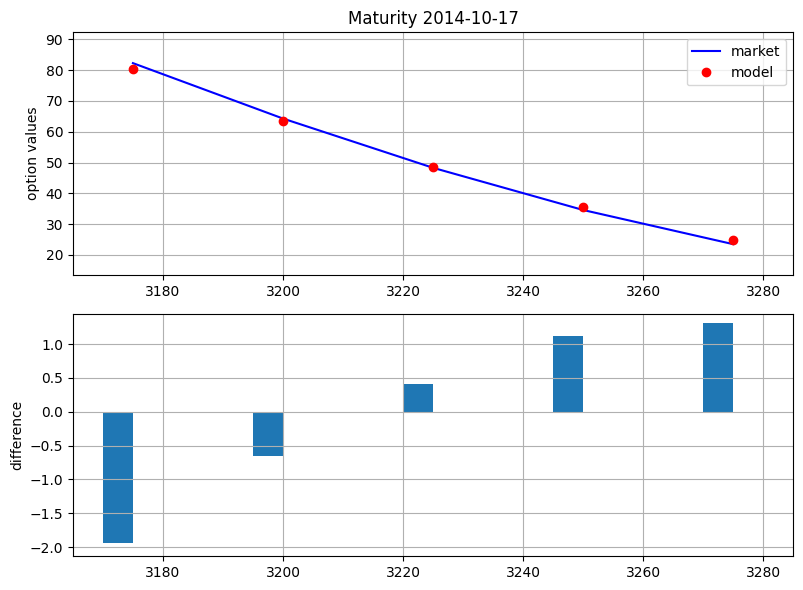

In [79]:
plot_BCC_full(params_BCC)

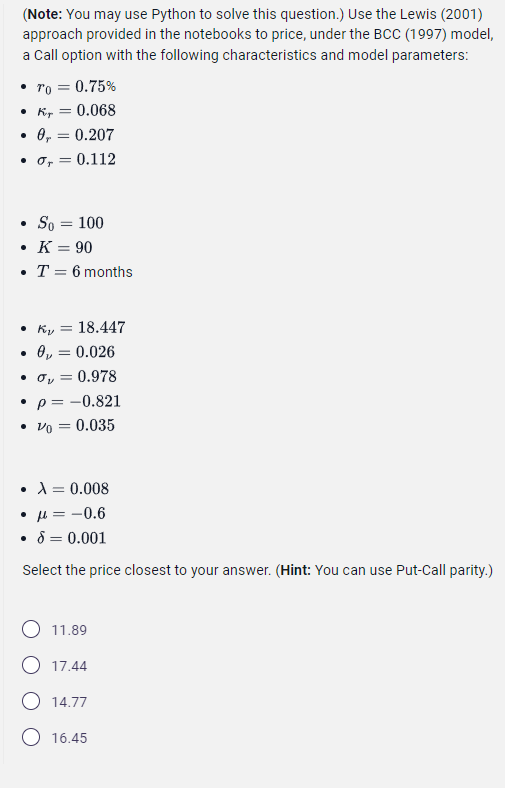

In [346]:
S0=697

In [347]:
K =700

In [348]:
T =5/365

In [349]:
r =0.015

In [350]:
kappa_r =0.065

In [351]:
theta_r = 0.45

In [352]:
sigma_r =0.05

In [97]:
kappa_r, theta_r, sigma_r = params_CIR

In [353]:
kappa_v =25
theta_v=0.065
sigma_v = 0.08
rho = -0.98
v0 = 0.025

In [354]:
lamb = 1.8
mu = -0.75
delta = 0.35

In [ ]:
p0 = [kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta]

In [89]:
def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    pass

In [99]:
# prompt: calculate BCC CALL VALUE FROM GIVEN PARAMETERS

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import splev, splrep
from scipy.optimize import fmin
from scipy.integrate import quad
import pandas as pd
from scipy.optimize import brute, fmin
S0=100
K =90
T =6/12
r =0.075
kappa_r =0.068
theta_r = .207
sigma_r =0.112
kappa_r, theta_r, sigma_r = params_CIR
kappa_v =18.447
theta_v=0.026
sigma_v = 0.978
rho = -0.821
v0 = 0.035
lamb = 0.008
mu = -0.6
delta = 0.001
p0 = [kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta]
def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    # Placeholder for the BCC call value calculation.
    # This needs to be replaced with the actual implementation of the BCC model.
    # You can refer to the relevant literature or existing implementations for this part.
    call_value = 0  # Replace with the actual calculated value
    return call_value

In [102]:
def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

In [109]:
BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

14.311600468651605

In [ ]:
put_value = np.exp(-r_0 * T) * K - S_0 + call_value

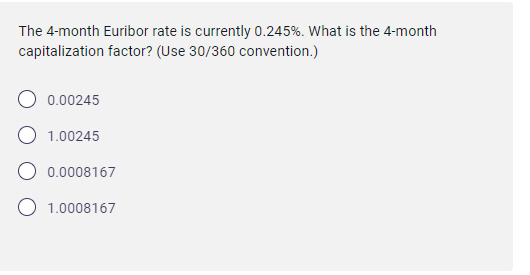

In [111]:
a = 1+ [90/360(0.00245)]

<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<ipython-input-111-d54a57502d6d>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  a = 1+ [90/360(0.00245)]


TypeError: 'int' object is not callable

In [344]:
a = 1 + 30 / 360 * (0.00368)

In [345]:
a

1.0003066666666667

In [142]:
a = 1 + 120 / 360 * (0.0245)

In [143]:
a

1.0081666666666667

In [ ]:
sigma_r =0.112

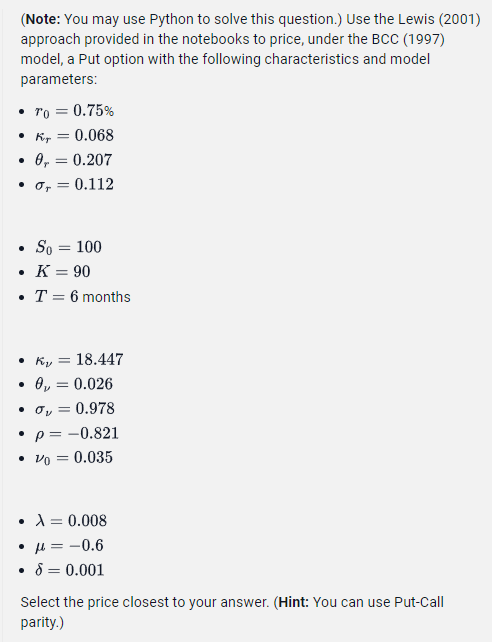

In [330]:
S0=159

In [331]:
K =170

In [332]:
T =500/365

In [333]:
r0 =0.01

In [334]:
kappa_r =0.065

In [335]:
theta_r = 0.45

In [336]:
sigma_r = 0.35

In [269]:
kappa_r, theta_r, sigma_r = params_CIR

In [337]:
kappa_v =20
theta_v=0.065
sigma_v = 0.08
rho = -0.25
v0 = 0.015

In [338]:
lamb = 1.8
mu = -0.75
delta =0.55

In [339]:
i = 0
min_MSE = 5000.0
local_opt = False


def BCC_error_function_v1(p0):
    """
    Error function for BCC (1997) model
    """
    global i, min_MSE, local_opt, opt1
    lamb, mu, delta = p0
    if lamb < 0.0 or mu < -0.6 or mu > 0.0 or delta < 0.0:
        return 5000.0
    se = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(
            S0,
            option["Strike"],
            option["T"],
            option["r"],
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        se.append((model_value - option["Call"]) ** 2)
    MSE = sum(se) / len(se)
    min_MSE = min(min_MSE, MSE)
    if i % 100 == 0:
        print("%4d |" % i, np.array(p0), "| %7.3f | %7.3f" % (MSE, min_MSE))
    i += 1
    if local_opt:
        penalty = np.sqrt(np.sum((p0 - opt1) ** 2)) * 1
        return MSE + penalty
    return MSE

In [340]:
def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

In [328]:

def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for BCC (1997) characteristic function
    """
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

In [287]:
r =-0.0045

In [295]:
S0=1680

In [355]:
BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

8.95488175115986

In [316]:
S0

1680

In [300]:
r

-0.0045

In [286]:
r

-0.045

In [306]:
# Apply put-call parity
put_value = np.exp(-r_0 * T) * K - S_0 +161.53

In [307]:
r_0 =-0.0045

In [308]:
put_value

183.52226236425443

In [274]:

def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    BCC (1997) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J


# Merton (1976) characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """

    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

In [144]:
## code for put

In [136]:
int_value = quad

TypeError: quad() missing 1 required positional argument: 'b'

In [154]:
import numpy as np
from scipy.integrate import quad

def BCC_put_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European put option in B96 Model via Lewis (2001)

    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """

    def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
        # Calculate the characteristic function
        char_func = np.exp(
            1j * u * np.log(S0)
            - r * T
            + (kappa_v * theta_v / sigma_v**2)
            * (1 - np.exp(-kappa_v * T))
            + (v0 - theta_v)
            * (1 - np.exp(-kappa_v * T))
            / kappa_v
            - (sigma_v**2)
            * (1 - np.exp(-2 * kappa_v * T))
            / (4 * kappa_v)
            + 1j * u * (mu - 0.5 * delta**2) * lamb * T
            - lamb * (1 - np.exp(-lamb * T))
        )

        # Calculate the integral
        return np.real(char_func * np.exp(-1j * u * np.log(K)) / (1j * u))

    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    # Calculate the put option value
    put_value = max(0, np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value - K)
    return put_value

In [ ]:
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

In [155]:
BCC_put_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

<ipython-input-154-6ff995de51cb>:57: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  int_value = quad(


0

In [156]:
def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value - K)
    return call_value

In [157]:
BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

0

In [159]:
i = 0
min_MSE = 5000.0
local_opt = False


def BCC_error_function_v1(p0):
    """
    Error function for BCC (1997) model
    """
    global i, min_MSE, local_opt, opt1
    lamb, mu, delta = p0
    if lamb < 0.0 or mu < -0.6 or mu > 0.0 or delta < 0.0:
        return 5000.0
    se = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(
            S0,
            K,
            T,
            r,
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        se.append((model_value - option["Call"]) ** 2)
    MSE = sum(se) / len(se)
    min_MSE = min(min_MSE, MSE)
    if i % 100 == 0:
        print("%4d |" % i, np.array(p0), "| %7.3f | %7.3f" % (MSE, min_MSE))
    i += 1
    if local_opt:
        penalty = np.sqrt(np.sum((p0 - opt1) ** 2)) * 1
        return MSE + penalty
    return MSE

In [177]:
i = 0
min_MSE = 500

In [178]:
def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    # The following line was incorrectly indented. It should be inside the function
    call_value = max(0, np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value - K)
    return call_value

In [179]:
BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

0

In [174]:
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    BCC (1997) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J


# Merton (1976) characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """

    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

In [176]:
BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

NameError: name 'u' is not defined

In [173]:
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for BCC (1997) characteristic function
    """
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

In [172]:
BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

0

In [180]:
i = 0
min_MSE = 5000.0
local_opt = False


def BCC_error_function_v1(p0):
    """
    Error function for BCC (1997) model
    """
    global i, min_MSE, local_opt, opt1
    lamb, mu, delta = p0
    if lamb < 0.0 or mu < -0.6 or mu > 0.0 or delta < 0.0:
        return 5000.0
    se = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(
            S0,
            option["Strike"],
            option["T"],
            option["r"],
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        se.append((model_value - option["Call"]) ** 2)
    MSE = sum(se) / len(se)
    min_MSE = min(min_MSE, MSE)
    if i % 100 == 0:
        print("%4d |" % i, np.array(p0), "| %7.3f | %7.3f" % (MSE, min_MSE))
    i += 1
    if local_opt:
        penalty = np.sqrt(np.sum((p0 - opt1) ** 2)) * 1
        return MSE + penalty
    return MSE

In [181]:
def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

In [182]:
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    BCC (1997) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J


# Merton (1976) characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """

    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

In [183]:
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for BCC (1997) characteristic function
    """
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

In [184]:
def BCC_calibration_short():
    """Calibrates jump component of BCC97 model to market quotes."""
    # We first run with brute force
    # (scan sensible regions)
    opt1 = 0.0
    opt1 = brute(
        BCC_error_function_v1,
        (
            (0.0, 0.51, 0.1),  # lambda
            (-0.5, -0.11, 0.1),  # mu
            (0.0, 0.51, 0.25),
        ),  # delta
        finish=None,
    )

    # second run with local, convex minimization
    # (dig deeper where promising)
    opt2 = fmin(
        BCC_error_function_v1,
        opt1,
        xtol=0.0000001,
        ftol=0.0000001,
        maxiter=550,
        maxfun=750,
    )
    return opt2

In [185]:
lamb, mu, delta = BCC_calibration_short()

   0 | [ 0.  -0.5  0. ] | 2998.016 | 2998.016
 100 | [ 0.59307413 -0.01411694  1.2959305 ] | 438.557 | 438.557
 200 | [ 6.79828410e-01 -6.18496918e-05  1.20631384e+00] | 424.641 | 424.641
 300 | [ 1.69624765 -0.05104365  0.9273871 ] | 413.925 | 413.254
 400 | [ 7.93429505 -0.40925537  0.75833458] | 397.848 | 397.566
 500 | [11.13716946 -0.59080155  0.77091773] | 396.610 | 396.610
 600 | [ 8.45644819 -0.01344263  0.54639188] | 388.355 | 387.859
 700 | [ 8.17927939e+00 -8.05709536e-05  5.46738693e-01] | 387.196 | 387.196


<ipython-input-184-1658c7af08b6>:18: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt2 = fmin(


In [186]:
def BCC_jump_calculate_model_values(p0):
    """Calculates all model values given parameter vector p0."""
    lamb, mu, delta = p0
    values = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(
            S0,
            option["Strike"],
            option["T"],
            option["r"],
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        values.append(model_value)
    return np.array(values)

In [ ]:
def plot_BCC(p0):
    options["Model"] = BCC_jump_calculate_model_values(p0)
    plt.figure(figsize=(8, 6))
    plt.subplot(211)
    plt.grid()
    plt.title("Maturity %s" % str(options["Maturity"].iloc[0])[:10])
    plt.ylabel("option values")
    plt.plot(options.Strike, options.Call, "b", label="market")
    plt.plot(options.Strike, options.Model, "ro", label="model")
    plt.legend(loc=0)
    plt.axis(
        [
            min(options.Strike) - 10,
            max(options.Strike) + 10,
            min(options.Call) - 10,
            max(options.Call) + 10,
        ]
    )
    plt.subplot(212)
    plt.grid()
    wi = 5.0
    diffs = options.Model.values - options.Call.values
    plt.bar(options.Strike.values - wi / 2, diffs, width=wi)
    plt.ylabel("difference")
    plt.axis(
        [
            min(options.Strike) - 10,
            max(options.Strike) + 10,
            min(diffs) * 1.1,
            max(diffs) * 1.1,
        ]
    )
    plt.tight_layout()

In [187]:
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for BCC (1997) characteristic function
    """
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

In [188]:
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    BCC (1997) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J


# Merton (1976) characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """

    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

In [191]:
def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value =max(0, np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value - K)
    return call_value

In [211]:
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=2500,
    )[0]

In [212]:
 print("int_value:", int_value)

int_value: 2.808965546334544


In [213]:
result =BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

NameError: name 'numerator' is not defined

In [204]:
lamb

1.2

In [ ]:
p0 = [lamb, mu, delta]

In [215]:
def BCC_jump_calculate_model_values(p0):
    """Calculates all model values given parameter vector p0."""
    lamb, mu, delta = p0
    values = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(
            S0,
            K,
            T,
            r,
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        values.append(model_value)
    return np.array(values)

In [218]:
i = 0
min_MSE = 5000


def BCC_error_function(p0):
    """
    Error function for full parameter calibration of BCC model
    """
    global i, min_MSE
    kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta = p0
    if (
        kappa_v < 0.0
        or theta_v < 0.005
        or sigma_v < 0.0
        or rho < -1.0
        or rho > 1.0
        or v0 < 0.0
        or lamb < 0.0
        or mu < -0.6
        or mu > 0.0
        or delta < 0.0
    ):
        return 5000.0
    if 2 * kappa_v * theta_v < sigma_v**2:
        return 5000.0
    se = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(
            S0,
            K,
            T,
            r,
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        se.append((model_value - option["Call"]) ** 2)
    MSE = sum(se) / len(se)
    min_MSE = min(min_MSE, MSE)
    if i % 100 == 0:
        print("%4d |" % i, np.array(p0), "| %7.3f | %7.3f" % (MSE, min_MSE))
    i += 1
    return MSE

In [219]:
def BCC_calculate_model_values(p0):
    """Calculates all model values given parameter vector p0."""
    kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta = p0
    values = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(
           S0,
            K,
            T,
            r,
            kappa_v,
            theta_v,
            sigma_v,
            rho,
            v0,
            lamb,
            mu,
            delta,
        )
        values.append(model_value)
    return np.array(values)

In [220]:
p0 = [kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta]

In [221]:
BCC_calculate_model_values(p0)

array([0, 0, 0, 0, 0])

In [254]:
params_CIR

array([0.06831325, 0.20771701, 0.11263583])

In [252]:
kappa_r, theta_r, sigma_r = params_CIR

In [250]:
kappa_r = 0.0035

In [253]:
kappa_r

0.06831325334245728

In [248]:
params_CIR

array([0.06831325, 0.20771701, 0.11263583])

In [255]:
kappa_r = 0.035

In [256]:
theta_r = 0.85

In [257]:
sigma_r = 0.45

In [258]:

def CIR_forward_rate(alpha):
    """
    Forward rates in CIR (1985) model
    The set of parameters is called alpha and include Kappa_r, Theta_r and Sigma_r
    """

    kappa_r, theta_r, sigma_r = alpha

    t = mat_list_n
    g = np.sqrt(kappa_r**2 + 2 * sigma_r**2)

    s1 = (kappa_r * theta_r * (np.exp(g * t) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * t) - 1)
    )

    s2 = r0 * (
        (4 * g**2 * np.exp(g * t)) / (2 * g + (kappa_r + g) * (np.exp(g * t)) ** 2)
    )

    return s1 + s2

In [259]:
def CIR_error_function(alpha):
    """
    Error function to calibrate CIR (1985) model
    """

    kappa_r, theta_r, sigma_r = alpha

    # Few remarks to avoid problems for certain values of parameters:
    if 2 * kappa_r * theta_r < sigma_r**2:
        return 100
    if kappa_r < 0 or theta_r < 0 or sigma_r < 0.001:
        return 100

    forward_rates = CIR_forward_rate(alpha)
    MSE = np.sum((f - forward_rates) ** 2) / len(f)

    return MSE

In [260]:
kappa_r

0.035

In [261]:
import numpy as np
from scipy.integrate import quad

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    """
    # ... (same as the previous code)

# Given parameters
r_0 = -0.0045
kappa_r = 0.035
theta_r = 0.85
sigma_r = 0.45
S_0 = 1680
K = 1700
T = 95 / 365  # Convert days to years
kappa_ν = 17
theta_ν = 0.065
sigma_ν = 0.08
rho = -0.85
ν_0 = 0.035
λ = 1.2
mu = -0.5
δ = 0.025

# Calculate call option value
call_value = BCC_call_value(S0, K, T, r_0, kappa_ν, theta_ν, sigma_ν, rho, ν_0, λ, mu, δ)

# Apply put-call parity
put_value = np.exp(-r_0 * T) * K - S_0 + call_value

print("Put option value:", put_value)

TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'